In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import os
print(os.getcwd())
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
df = pd.read_csv(r"datasets\dataset - NPB.csv")


C:\Users\work\Documents\GitHub\historica_stats\baseball_notebooks


In [10]:
df_totals = pd.DataFrame(columns=['Streak Total' ,'Quantity Over', 'Quantity Under'])
for i in range(16):
    df_totals = df_totals.append({'Streak Total': i,'Quantity Over': 0, 'Quantity Under': 0},ignore_index=True )
    
def check_under(under):
    if under > 0 :
        df_totals["Quantity Under"][under] = df_totals["Quantity Under"][under] + 1
        
def check_over(over):
    if over > 0 :
        df_totals["Quantity Over"][over] = df_totals["Quantity Over"][over] + 1

In [11]:
import matplotlib.pyplot as plt
home = df[['home_team', 'score_home', 'score_away']].copy()
#columns = ['home_team','score_home','score_away']
#df1 = pd.DataFrame(df, columns=columns)
home_wins = 0 
away_wins = 0 
total_games = 0 
for i,j in home.iterrows():
    team = j[0]
    home = j[1]
    away = j[2]
    if home > away:
        home_wins += 1.0
    else:
        away_wins += 1.0
total = (home_wins + away_wins)
perc = round(home_wins/total*100, 2)
print("Home Wins: " + str(home_wins) + "->  %" +  str(perc))
print("Away Wins: "+ str(away_wins) + "->  %" +  str(100-perc))
print("Total Games: " + str(total))



Home Wins: 51.0->  %57.95
Away Wins: 37.0->  %42.05
Total Games: 88.0


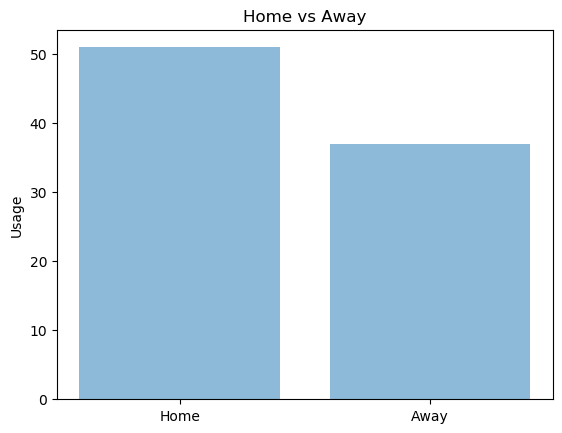

In [12]:
import matplotlib.pyplot as plt; plt.rcdefaults()

objects = ('Home', 'Away')
y_pos = np.arange(len(objects))
performance = [home_wins,away_wins]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Home vs Away')

plt.show()

## Overs & Unders

In [13]:
totals = df[['home_team','away_team', 'total_line']].copy()
over = 0
under = 0
total = 0


team_stats={}
league_stats={}

league_stats = {'winning': {1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0},
                'losing': {1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0},
                'over': {1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0},
                'under': {1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0}
               }


for i in totals.home_team.unique():
    team_stats[i] = {
                'totals': {'over': 0, 'under': 0 },
                'moneyline' : {'win':0, 'lost': 0},
                'streak_ml' : {'win':0, 'lost': 0},
                'streak_total' : {'over':0, 'under': 0}}
    

for i in totals.away_team.unique():
    if i not in team_stats:
        team_stats[i] = {
                    'totals': {'over': 0, 'under': 0 },
                    'moneyline' : {'win':0, 'lost': 0},
                    'streak_ml' : {'win':0, 'lost': 0},
                    'streak_total' : {'over':0, 'under': 0}
        }


In [14]:
# iterate through each row and select  
# 'Name' and 'Stream' column respectively. 

#totals logic 
for ind in df.index: 

    total_result = df['score_home'][ind] + df['score_away'][ind]
    if (total_result > df['total_line'][ind]):

        
        team_stats[df['home_team'][ind]]['totals']['over']+=1
        team_stats[df['away_team'][ind]]['totals']['over']+=1
        team_stats[df['home_team'][ind]]['streak_total']['over']+=1
        team_stats[df['away_team'][ind]]['streak_total']['over']+=1
        
        
        check_under(team_stats[df['home_team'][ind]]['streak_total']['under'])
        check_under(team_stats[df['away_team'][ind]]['streak_total']['under'])
        
        
        
        team_stats[df['home_team'][ind]]['streak_total']['under'] = 0
        team_stats[df['away_team'][ind]]['streak_total']['under'] = 0
        
        
                
        league_stats['over'][team_stats[df['home_team'][ind]]['streak_total']['over']] += 1
            
    if ( df['total_line'][ind] > total_result):
        team_stats[df['home_team'][ind]]['totals']['under']+=1
        team_stats[df['away_team'][ind]]['totals']['under']+=1
        team_stats[df['home_team'][ind]]['streak_total']['under']+=1
        team_stats[df['away_team'][ind]]['streak_total']['under']+=1
        
        check_over(team_stats[df['home_team'][ind]]['streak_total']['over'])
        check_over(team_stats[df['away_team'][ind]]['streak_total']['over'])
        
        team_stats[df['home_team'][ind]]['streak_total']['over'] = 0
        team_stats[df['away_team'][ind]]['streak_total']['over'] = 0
            
        league_stats['under'][team_stats[df['home_team'][ind]]['streak_total']['under']] += 1
        
    
        

    

In [15]:
# iterate through each row and select  
# 'Name' and 'Stream' column respectively. 

#moneyline logic
for ind in df.index: 
    
    

    if df['score_home'][ind]  > df['score_away'][ind] :
        team_stats[df['home_team'][ind]]['moneyline']['win']+=1
        team_stats[df['home_team'][ind]]['streak_ml']['win'] += 1
        team_stats[df['home_team'][ind]]['streak_ml']['lost'] = 0
        
        team_stats[df['away_team'][ind]]['moneyline']['lost']+=1
        team_stats[df['away_team'][ind]]['streak_ml']['lost']+= 1
        team_stats[df['away_team'][ind]]['streak_ml']['win'] = 0
        
    if (df['score_home'][ind]  < df['score_away'][ind]) :
        
        team_stats[df['away_team'][ind]]['moneyline']['win']+=1
        team_stats[df['away_team'][ind]]['streak_ml']['win'] += 1
        team_stats[df['away_team'][ind]]['streak_ml']['lost'] = 0
        
        team_stats[df['home_team'][ind]]['moneyline']['lost']+=1
        team_stats[df['home_team'][ind]]['streak_ml']['lost']+= 1
        team_stats[df['home_team'][ind]]['streak_ml']['win'] = 0
 
        


In [16]:
dict_team=sorted(team_stats.keys(), key=lambda x:x.lower())
#idx = df.apply(lambda ts: any(ts == 'SK Wyverns'), axis=1)
#print(df[idx])

In [17]:
df_totals.head(10)

,Streak Total,Quantity Over,Quantity Under
0,0,0,0
1,1,24,16
2,2,9,15
3,3,4,8
4,4,2,3
5,5,1,2
6,6,0,0
7,7,0,0
8,8,0,0
9,9,0,0


In [18]:
df_ml_trends = pd.DataFrame(columns = ['Team', 'MoneyLine Record', 'Cover %', 'Streak Win', 'Streak Loss'])
df_total_trends = pd.DataFrame( columns = ['Team', 'Total Record', 'Over %', 'Streak Over', 'Streak Under'])

for i in dict_team:
    df_ml_trends = df_ml_trends.append({'Team': i,
                                          'MoneyLine Record': str(team_stats[i]['moneyline']['win']) + '-' + str(team_stats[i]['moneyline']['lost']),
                                          'Cover %' : team_stats[i]['moneyline']['win'] / (team_stats[i]['moneyline']['win'] + team_stats[i]['moneyline']['lost']),
                                          'Streak Win': team_stats[i]['streak_ml']['win'],
                                          'Streak Loss': team_stats[i]['streak_ml']['lost']},ignore_index=True )
    

    df_total_trends = df_total_trends.append({'Team': i,
                                          'Total Record': str(team_stats[i]['totals']['over']) + '-' + str(team_stats[i]['totals']['under']),
                                          'Over %' : team_stats[i]['totals']['over'] / (team_stats[i]['totals']['over'] + team_stats[i]['totals']['under']),
                                          'Streak Over': team_stats[i]['streak_total']['over'],
                                          'Streak Under': team_stats[i]['streak_total']['under']},ignore_index=True )
    
        
df = df_totals[(df_totals.T != 0).any()]



In [19]:
df_ml_trends

,Team,MoneyLine Record,Cover %,Streak Win,Streak Loss
0,Chiba Lotte Marines,9-6,0.600000,0,3
1,Chunichi Dragons,7-8,0.466667,1,0
2,Fukuoka S. Hawks,6-8,0.428571,0,1
3,Hanshin Tigers,4-10,0.285714,2,0
4,Hiroshima Carps,5-7,0.416667,0,4
5,Nippon Ham Fighters,6-8,0.428571,1,0
6,Orix Buffaloes,4-10,0.285714,2,0
7,Rakuten Gold. Eagles,11-4,0.733333,3,0
8,Seibu Lions,7-7,0.500000,0,2
9,Yakult Swallows,7-7,0.500000,0,1


In [20]:
df_total_trends

,Team,Total Record,Over %,Streak Over,Streak Under
0,Chiba Lotte Marines,7-8,0.466667,1,0
1,Chunichi Dragons,6-9,0.400000,2,0
2,Fukuoka S. Hawks,6-9,0.400000,0,1
3,Hanshin Tigers,6-8,0.428571,2,0
4,Hiroshima Carps,6-7,0.461538,3,0
5,Nippon Ham Fighters,7-8,0.466667,0,1
6,Orix Buffaloes,7-8,0.466667,1,0
7,Rakuten Gold. Eagles,8-7,0.533333,1,0
8,Seibu Lions,7-8,0.466667,1,0
9,Yakult Swallows,7-7,0.500000,0,1


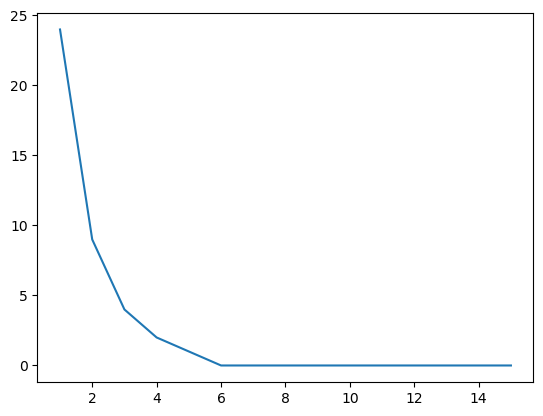

In [21]:
df['Quantity Over'].plot()

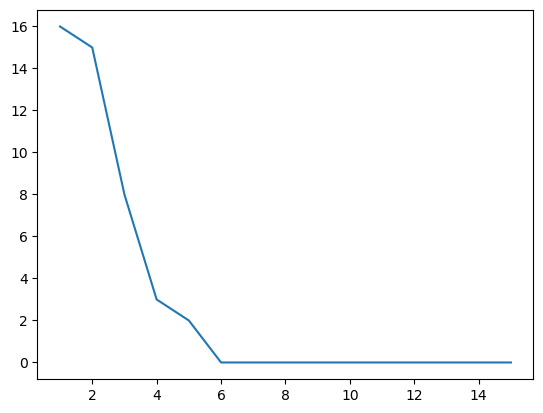

In [22]:
df['Quantity Under'].plot()